In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
index_names = ['engine_number', 'time_cycles']
setting_names = ['op_setting_1', 'op_setting_2', 'op_setting_3']
sensor_names=['sensor_measurement{}'.format(i+1) for i in range(0,23)]
col_names = index_names + setting_names + sensor_names
rul_names = ['RUL']

In [4]:

train1 = pd.read_csv("./sample_data/train_FD001.txt", header=None, sep=" ",names=col_names)
test1 = pd.read_csv("./sample_data/test_FD001.txt", header=None, sep=" ",names=col_names)
rul1 = pd.read_csv("./sample_data/RUL_FD001.txt", header=None,names=rul_names)


In [5]:
print("train1 shape:", train1.shape)
print("test1 shape:", test1.shape)
print("rul1 shape:", rul1.shape)


train1 shape: (20631, 28)
test1 shape: (13096, 28)
rul1 shape: (100, 1)


In [6]:
train1.head()

,engine_number,time_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_measurement1,sensor_measurement2,sensor_measurement3,sensor_measurement4,sensor_measurement5,...,sensor_measurement14,sensor_measurement15,sensor_measurement16,sensor_measurement17,sensor_measurement18,sensor_measurement19,sensor_measurement20,sensor_measurement21,sensor_measurement22,sensor_measurement23
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [7]:
test1.head()

,engine_number,time_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_measurement1,sensor_measurement2,sensor_measurement3,sensor_measurement4,sensor_measurement5,...,sensor_measurement14,sensor_measurement15,sensor_measurement16,sensor_measurement17,sensor_measurement18,sensor_measurement19,sensor_measurement20,sensor_measurement21,sensor_measurement22,sensor_measurement23
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN


In [8]:
# Drop Nan column
train1 = train1.drop(columns=['sensor_measurement22','sensor_measurement23'],axis=1)
test1 = test1.drop(columns=['sensor_measurement22','sensor_measurement23'],axis=1)

In [9]:
# Check null values
train1.isnull().sum()

engine_number           0
time_cycles             0
op_setting_1            0
op_setting_2            0
op_setting_3            0
sensor_measurement1     0
sensor_measurement2     0
sensor_measurement3     0
sensor_measurement4     0
sensor_measurement5     0
sensor_measurement6     0
sensor_measurement7     0
sensor_measurement8     0
sensor_measurement9     0
sensor_measurement10    0
sensor_measurement11    0
sensor_measurement12    0
sensor_measurement13    0
sensor_measurement14    0
sensor_measurement15    0
sensor_measurement16    0
sensor_measurement17    0
sensor_measurement18    0
sensor_measurement19    0
sensor_measurement20    0
sensor_measurement21    0
dtype: int64

In [10]:
test1.isnull().sum()

engine_number           0
time_cycles             0
op_setting_1            0
op_setting_2            0
op_setting_3            0
sensor_measurement1     0
sensor_measurement2     0
sensor_measurement3     0
sensor_measurement4     0
sensor_measurement5     0
sensor_measurement6     0
sensor_measurement7     0
sensor_measurement8     0
sensor_measurement9     0
sensor_measurement10    0
sensor_measurement11    0
sensor_measurement12    0
sensor_measurement13    0
sensor_measurement14    0
sensor_measurement15    0
sensor_measurement16    0
sensor_measurement17    0
sensor_measurement18    0
sensor_measurement19    0
sensor_measurement20    0
sensor_measurement21    0
dtype: int64

In [11]:
# duplicated row
print(train1.duplicated().sum())
print(test1.duplicated().sum())
# train1 and test1 dataset does not have any missing values

0
0


In [12]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   engine_number         20631 non-null  int64  
 1   time_cycles           20631 non-null  int64  
 2   op_setting_1          20631 non-null  float64
 3   op_setting_2          20631 non-null  float64
 4   op_setting_3          20631 non-null  float64
 5   sensor_measurement1   20631 non-null  float64
 6   sensor_measurement2   20631 non-null  float64
 7   sensor_measurement3   20631 non-null  float64
 8   sensor_measurement4   20631 non-null  float64
 9   sensor_measurement5   20631 non-null  float64
 10  sensor_measurement6   20631 non-null  float64
 11  sensor_measurement7   20631 non-null  float64
 12  sensor_measurement8   20631 non-null  float64
 13  sensor_measurement9   20631 non-null  float64
 14  sensor_measurement10  20631 non-null  float64
 15  sensor_measurement1

In [13]:
test1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   engine_number         13096 non-null  int64  
 1   time_cycles           13096 non-null  int64  
 2   op_setting_1          13096 non-null  float64
 3   op_setting_2          13096 non-null  float64
 4   op_setting_3          13096 non-null  float64
 5   sensor_measurement1   13096 non-null  float64
 6   sensor_measurement2   13096 non-null  float64
 7   sensor_measurement3   13096 non-null  float64
 8   sensor_measurement4   13096 non-null  float64
 9   sensor_measurement5   13096 non-null  float64
 10  sensor_measurement6   13096 non-null  float64
 11  sensor_measurement7   13096 non-null  float64
 12  sensor_measurement8   13096 non-null  float64
 13  sensor_measurement9   13096 non-null  float64
 14  sensor_measurement10  13096 non-null  float64
 15  sensor_measurement1

In [14]:
rul1

,RUL
0,112
1,98
2,69
3,82
4,91
...,...
95,137
96,82
97,59
98,117


### Statistical Analysis

In [15]:
train1[['engine_number', 'time_cycles']].describe().T

,count,mean,std,min,25%,50%,75%,max
engine_number,20631.0,51.506568,29.227633,1.0,26.0,52.0,77.0,100.0
time_cycles,20631.0,108.807862,68.880990,1.0,52.0,104.0,156.0,362.0


In [16]:
train1[['op_setting_1', 'op_setting_2', 'op_setting_3']].describe().T

,count,mean,std,min,25%,50%,75%,max
op_setting_1,20631.0,-0.000009,0.002187,-0.0087,-0.0015,0.0,0.0015,0.0087
op_setting_2,20631.0,0.000002,0.000293,-0.0006,-0.0002,0.0,0.0003,0.0006
op_setting_3,20631.0,100.000000,0.000000,100.0000,100.0000,100.0,100.0000,100.0000


-->op_setting_3 shows constant values.

In [17]:
train1.columns

Index(['engine_number', 'time_cycles', 'op_setting_1', 'op_setting_2',
       'op_setting_3', 'sensor_measurement1', 'sensor_measurement2',
       'sensor_measurement3', 'sensor_measurement4', 'sensor_measurement5',
       'sensor_measurement6', 'sensor_measurement7', 'sensor_measurement8',
       'sensor_measurement9', 'sensor_measurement10', 'sensor_measurement11',
       'sensor_measurement12', 'sensor_measurement13', 'sensor_measurement14',
       'sensor_measurement15', 'sensor_measurement16', 'sensor_measurement17',
       'sensor_measurement18', 'sensor_measurement19', 'sensor_measurement20',
       'sensor_measurement21'],
      dtype='object')

In [18]:
train1[['sensor_measurement1', 'sensor_measurement2', 'sensor_measurement3',
       'sensor_measurement4', 'sensor_measurement5', 'sensor_measurement6',
       'sensor_measurement7', 'sensor_measurement8', 'sensor_measurement9',
       'sensor_measurement10', 'sensor_measurement11', 'sensor_measurement12',
       'sensor_measurement13', 'sensor_measurement14', 'sensor_measurement15',
       'sensor_measurement16', 'sensor_measurement17', 'sensor_measurement18',
       'sensor_measurement19', 'sensor_measurement20', 'sensor_measurement21']].describe().T

,count,mean,std,min,25%,50%,75%,max
sensor_measurement1,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
sensor_measurement2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
sensor_measurement3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
sensor_measurement4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
sensor_measurement5,20631.0,14.620000,1.776400e-15,14.6200,14.6200,14.6200,14.6200,14.6200
sensor_measurement6,20631.0,21.609803,1.388985e-03,21.6000,21.6100,21.6100,21.6100,21.6100
sensor_measurement7,20631.0,553.367711,8.850923e-01,549.8500,552.8100,553.4400,554.0100,556.0600
sensor_measurement8,20631.0,2388.096652,7.098548e-02,2387.9000,2388.0500,2388.0900,2388.1400,2388.5600
sensor_measurement9,20631.0,9065.242941,2.208288e+01,9021.7300,9053.1000,9060.6600,9069.4200,9244.5900
sensor_measurement10,20631.0,1.300000,0.000000e+00,1.3000,1.3000,1.3000,1.3000,1.3000


sensor_measurement1,sensor_measurement5,sensor_measurement6 sensor_measurement8,sensor_measurement10, sensor_measurement13,sensor_measurement16,sensor_measurement18,sensor_measurement19 have constant values

In [19]:
# Number of engine
train1['engine_number'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [20]:
#max cycle of engine
train1.groupby('engine_number')['time_cycles'].max()

engine_number
1      192
2      287
3      179
4      189
5      269
      ... 
96     336
97     202
98     156
99     185
100    200
Name: time_cycles, Length: 100, dtype: int64

In [21]:
train1[train1['engine_number'] == 1].groupby('engine_number')['time_cycles'].max()


engine_number
1    192
Name: time_cycles, dtype: int64

### Visualisation

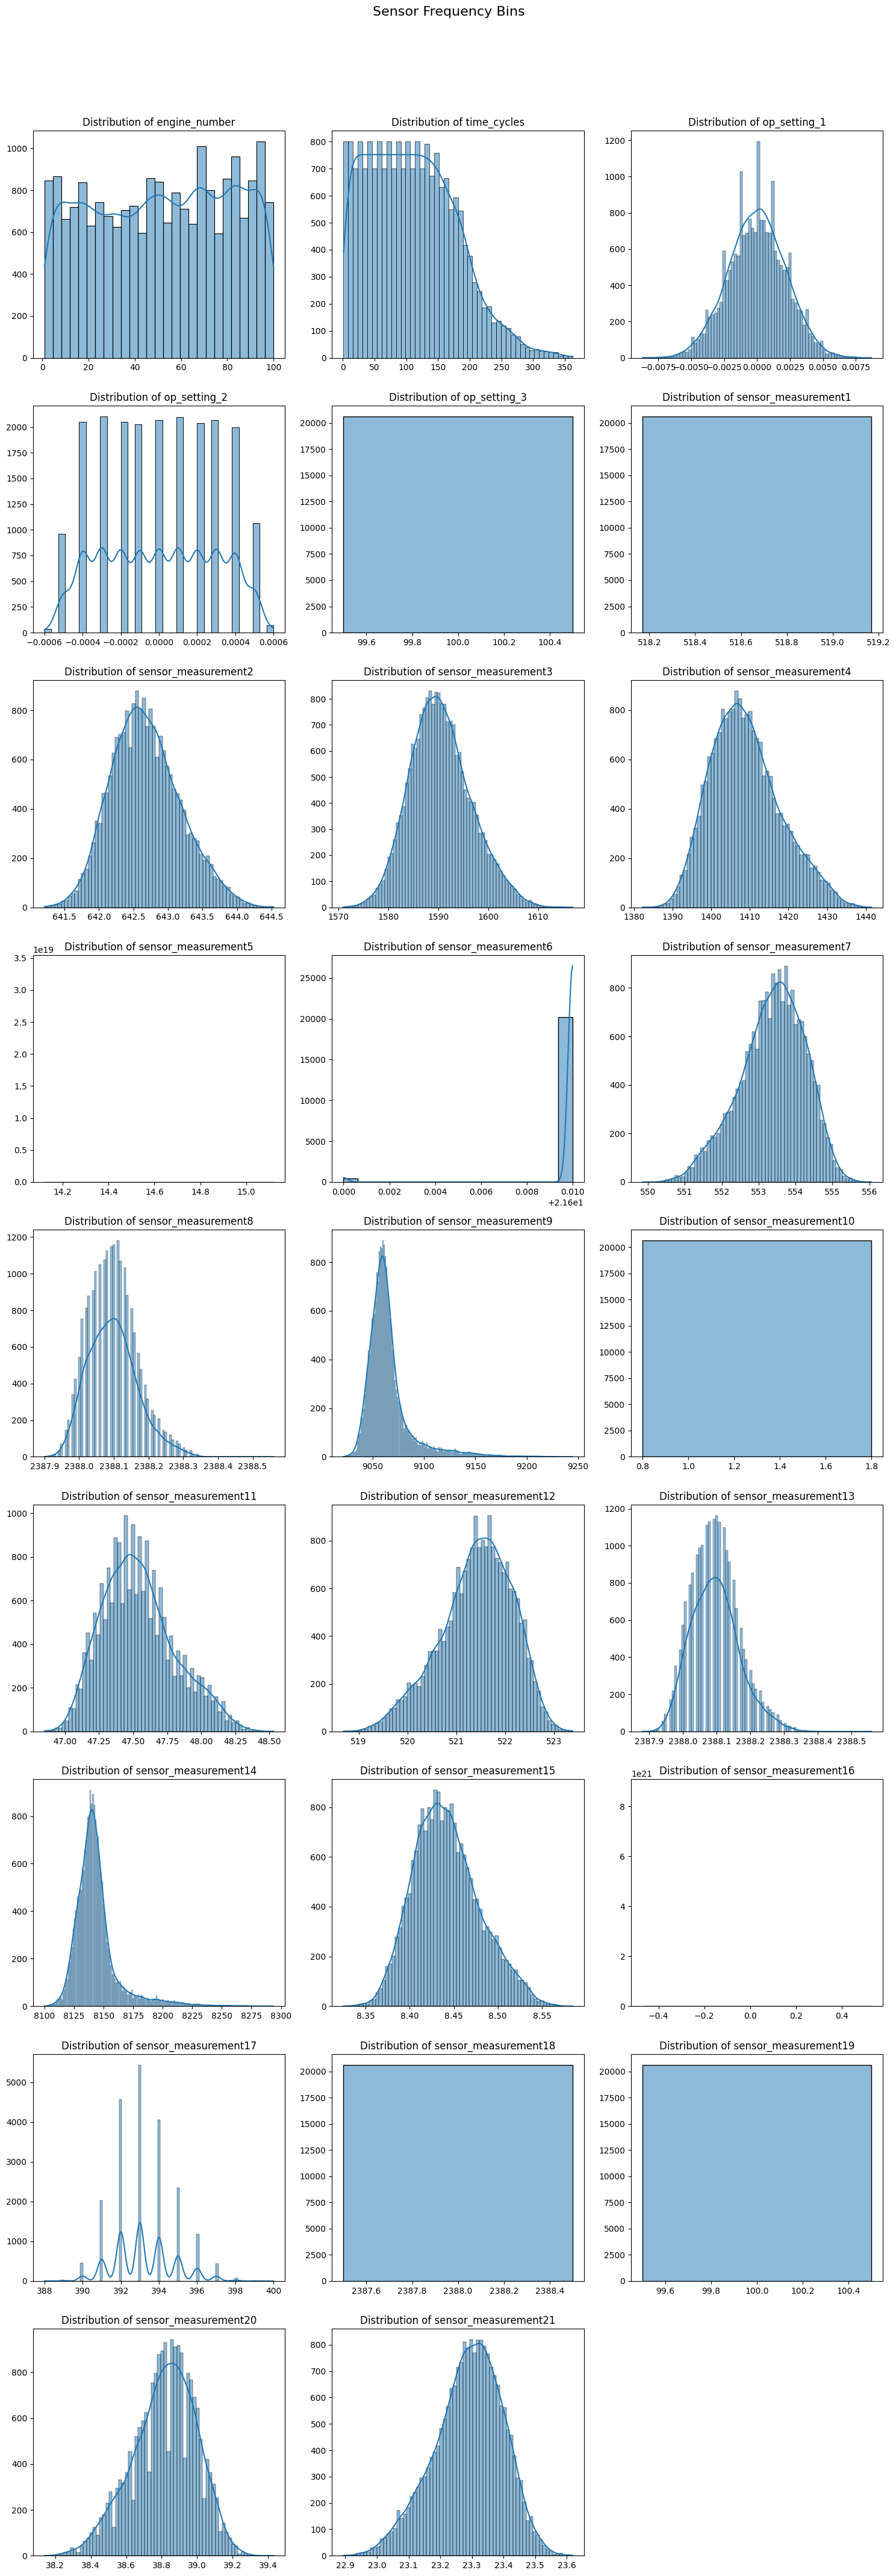

In [22]:
def plot_three_columns_per_row(data_frame):
    num_columns = len(data_frame.columns)
    num_rows = (num_columns + 2) // 3  # Calculate the number of rows needed for 3 columns per row

    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))

    # Add a title to the entire plot
    fig.suptitle('Sensor Frequency Bins', fontsize=16)

    for i, col in enumerate(data_frame.columns):
        row = i // 3
        col_num = i % 3
        sns.histplot(data_frame[col], kde=True, ax=axes[row, col_num])
        axes[row, col_num].set_title(f'Distribution of {col}')
        axes[row, col_num].set_xlabel('')
        axes[row, col_num].set_ylabel('')
         # Remove any empty subplots in the last row if the number of columns is not a multiple of 3
    if num_columns % 3 != 0:
        for j in range(num_columns % 3, 3):
            fig.delaxes(axes[num_rows - 1, j])


    # Adjust layout to make space for the title above the subplots
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Show the plot (you can comment this line out if you only want to save the image)
    plt.show()

# Call the function to plot three graphs per row for your DataFrame
plot_three_columns_per_row(train1)

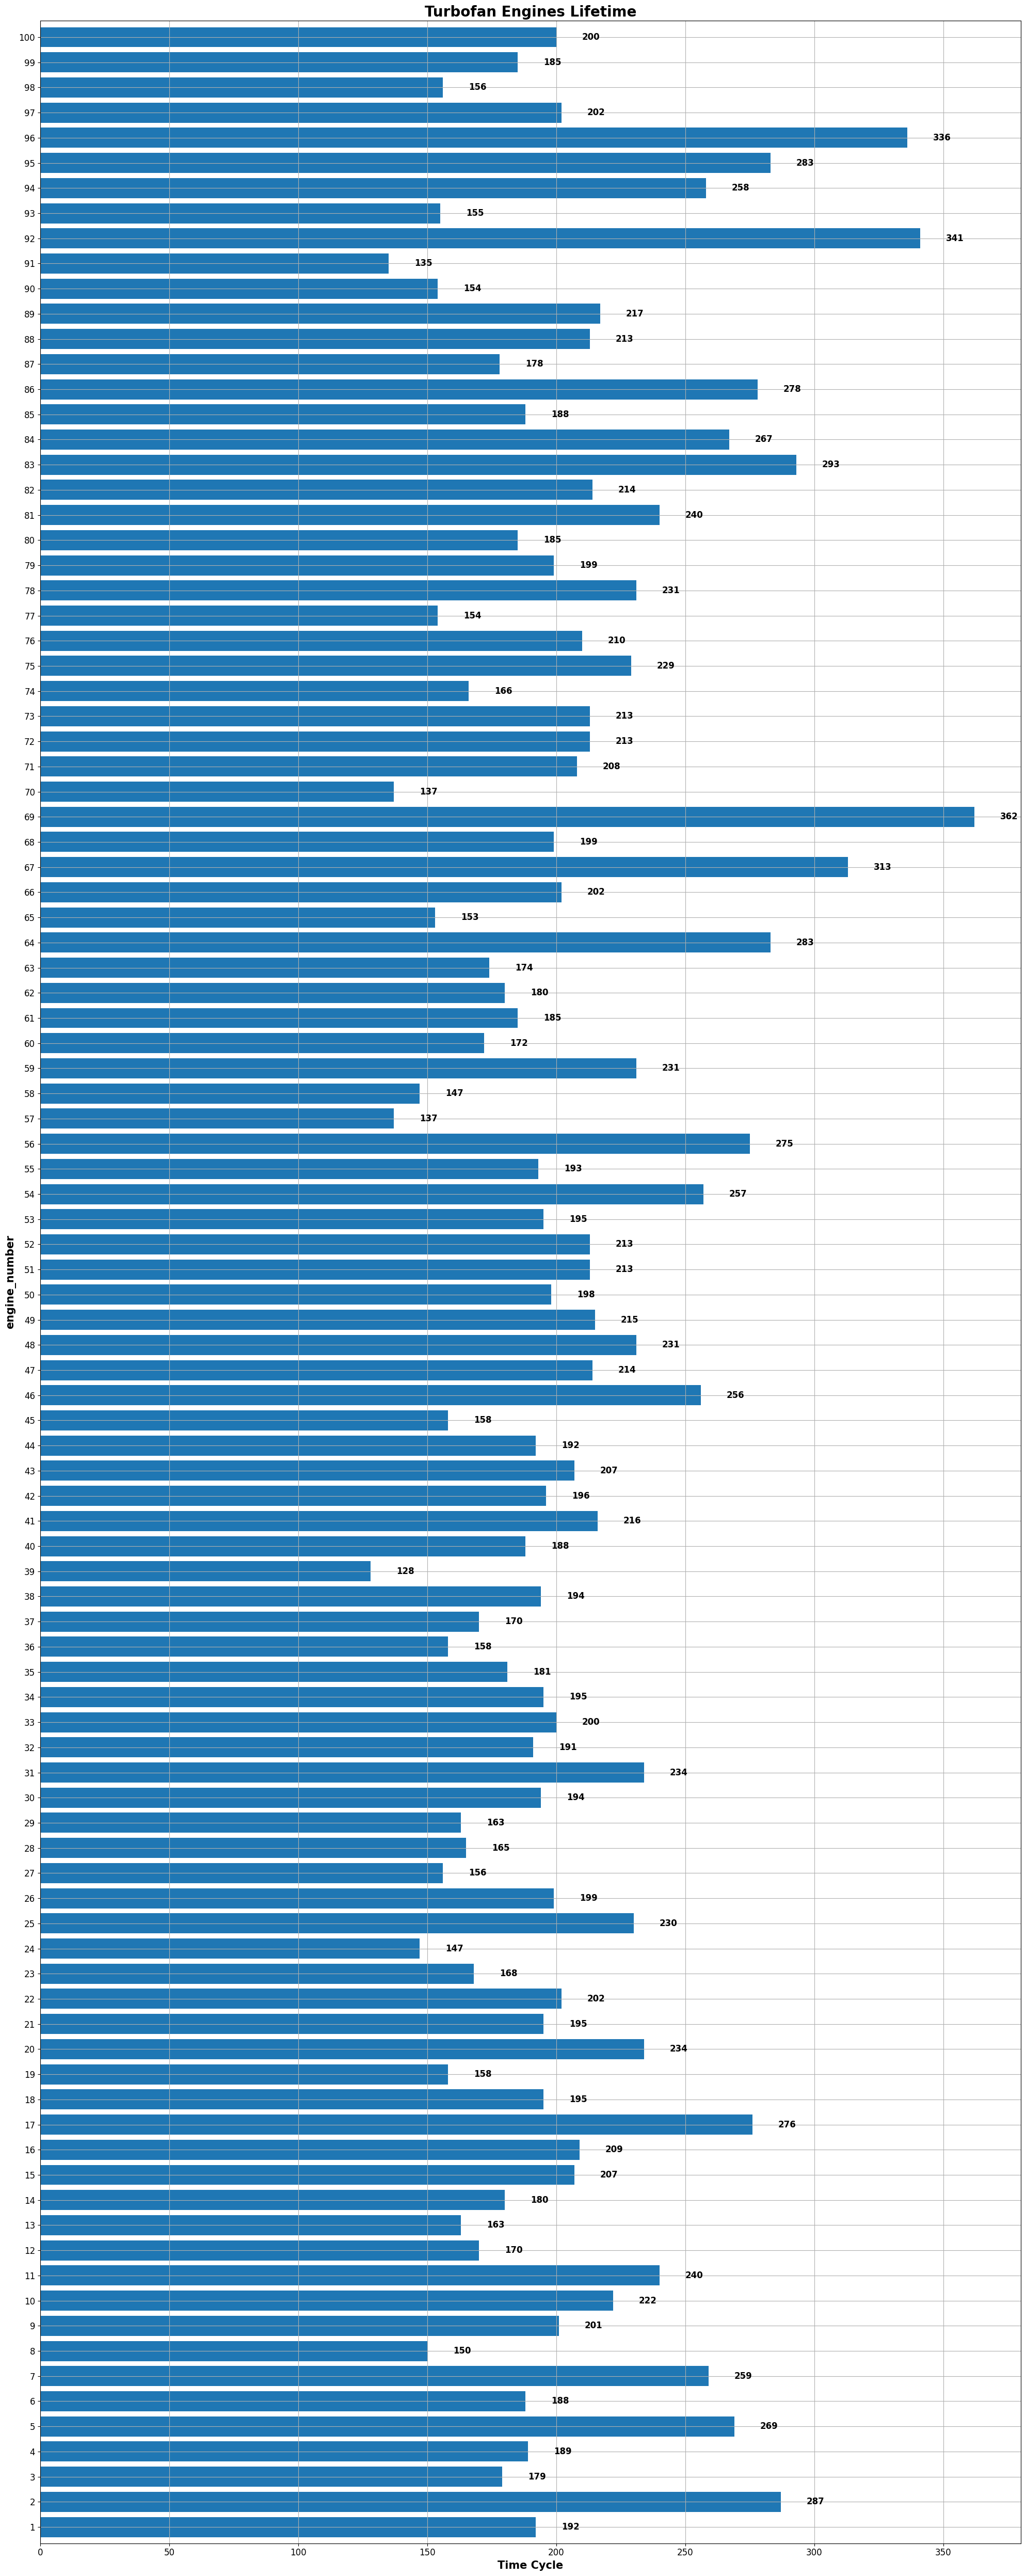

In [23]:
def plot_max_time_cycles(data_frame, index_column, value_column, figsize=(20, 10), save_filename=None):
    max_time_cycles = data_frame.groupby(index_column)[value_column].max()

    plt.figure(figsize=figsize)
    ax = max_time_cycles.plot(kind='barh', stacked=True, width=0.8, align='center')

    plt.title('Turbofan Engines Lifetime', fontweight='bold', size=20)
    plt.xlabel('Time Cycle', fontweight='bold', size=15)
    plt.ylabel(index_column, fontweight='bold', size=15)
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.grid(True)


    # Annotate bars with the number of cycles at the end
    for i, v in enumerate(max_time_cycles):
        ax.text(v + 10, i, str(v), color='black', fontweight='bold', va='center', size=12)

    plt.tight_layout()
    plt.show()

# Call the function to create the stacked bar plot and save it as an image
plot_max_time_cycles(train1, index_column='engine_number', value_column='time_cycles', figsize=(20, 50))

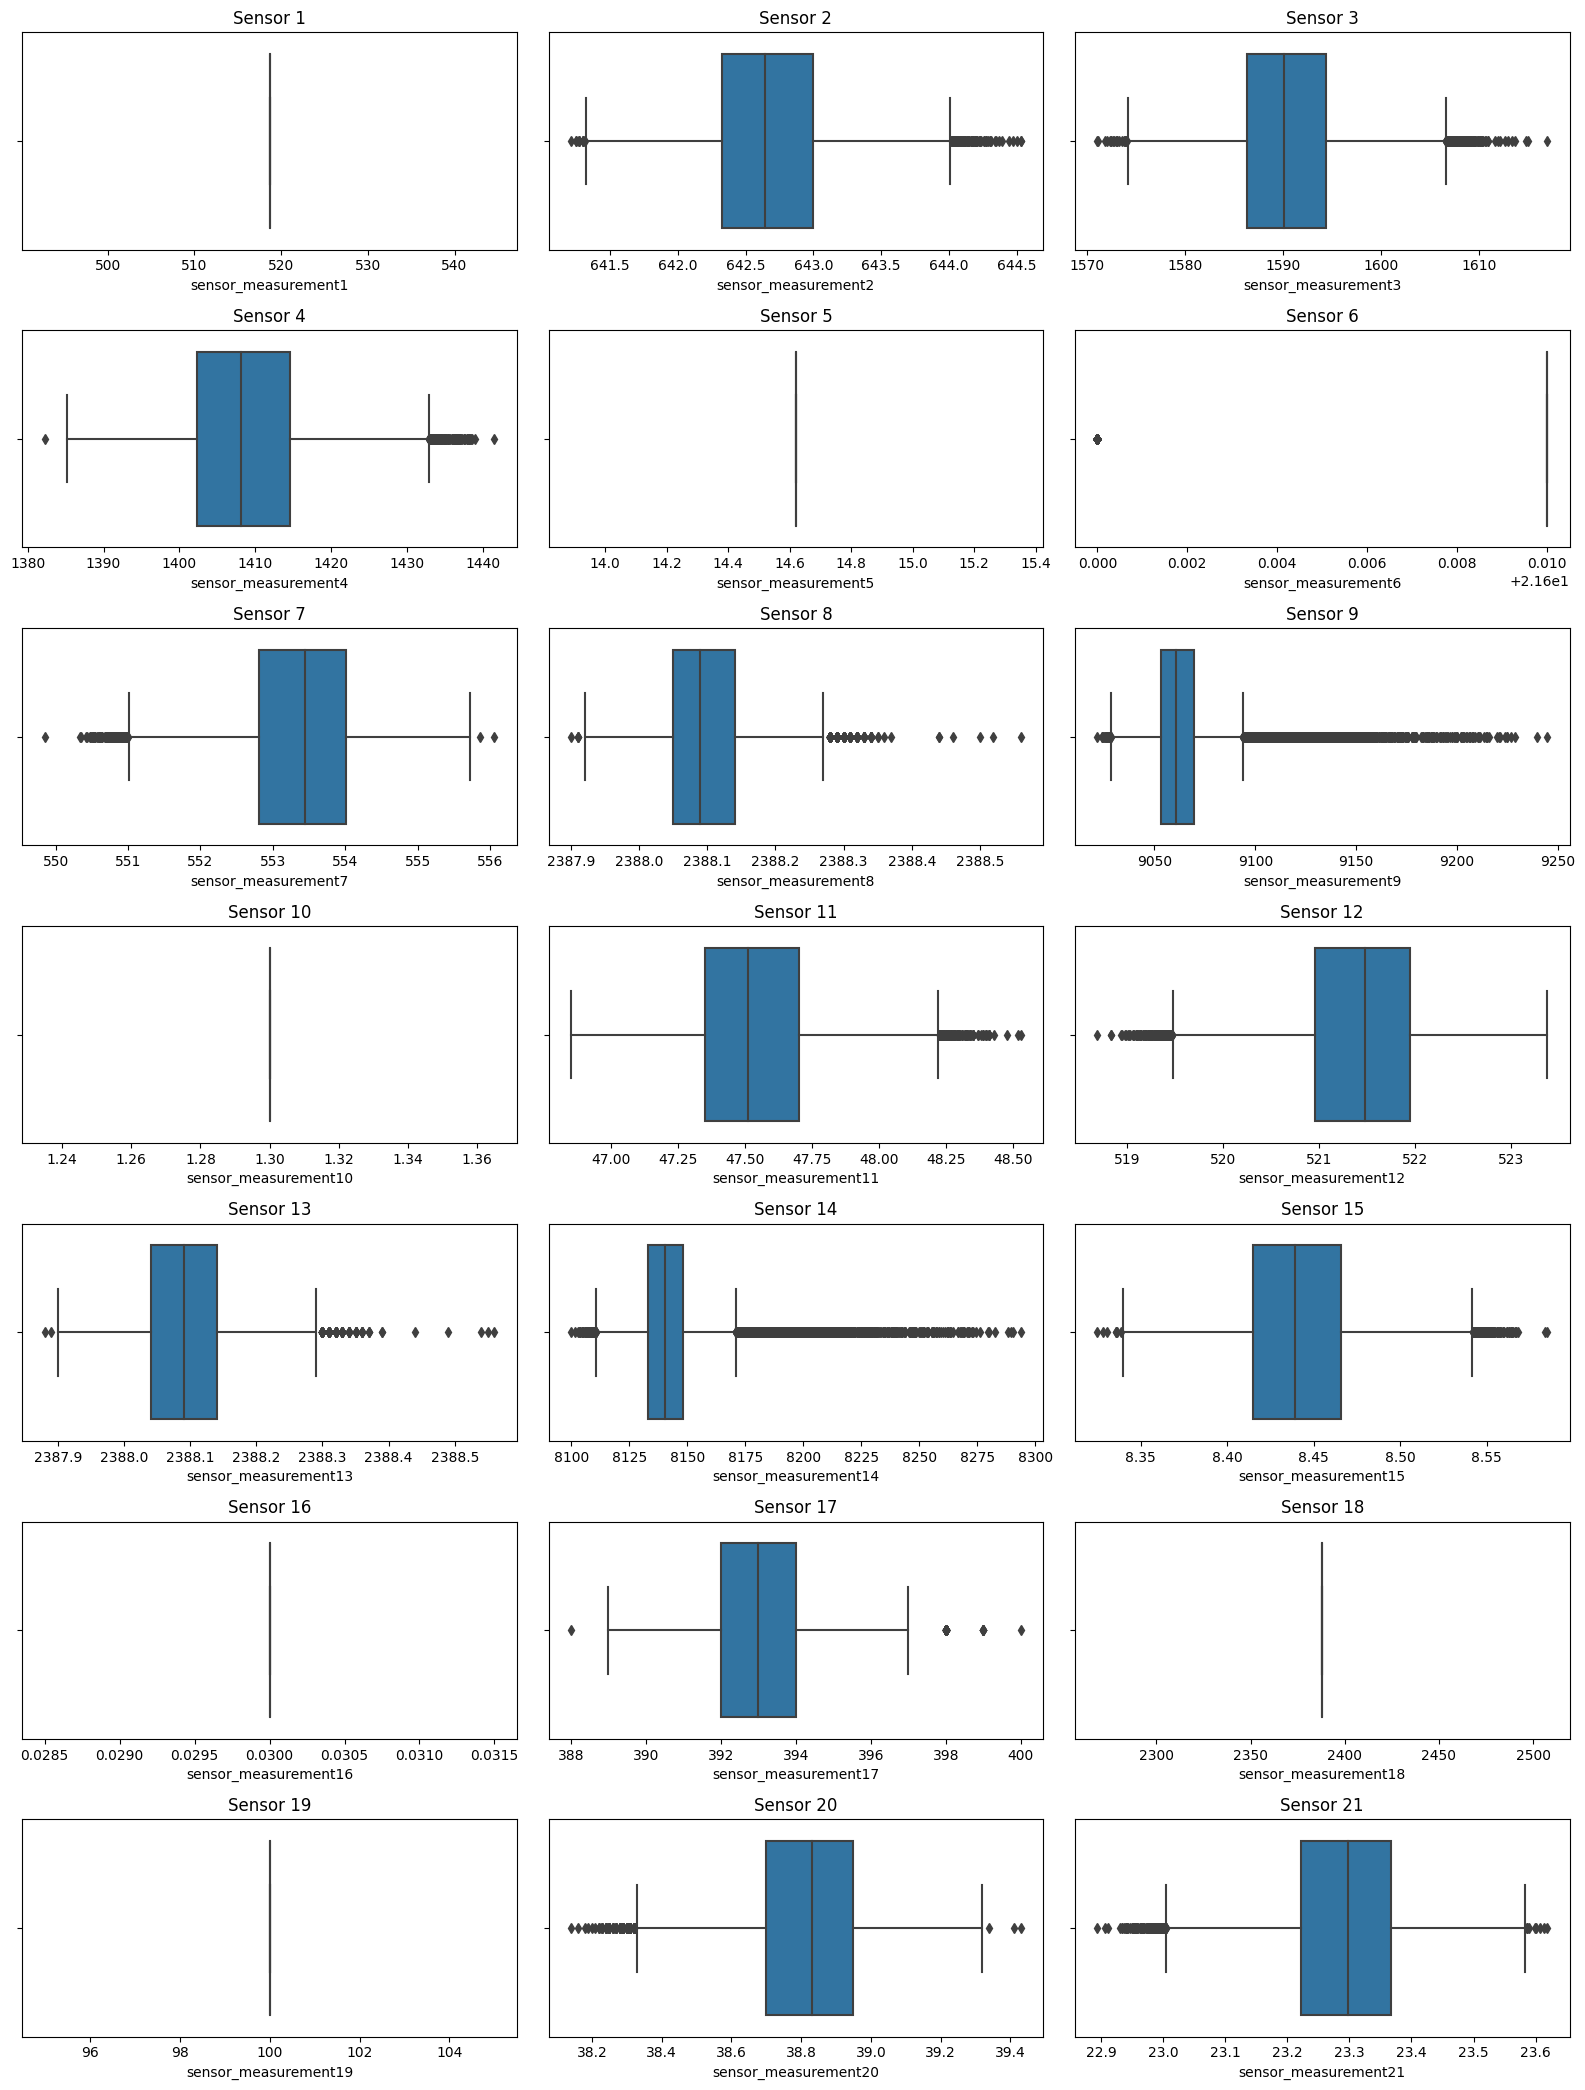

In [24]:
# Check Outliers only for sensor data
plt.figure(figsize=(16, 21))

for i in range(21):
    temp_data = train1.iloc[:, i + 5]
    plt.subplot(7, 3, i + 1)
    sns.boxplot(x=temp_data)
    plt.title("Sensor " + str(i + 1))

plt.tight_layout()
plt.show()

In [25]:
columns_to_plot =[ 'sensor_measurement1', 'sensor_measurement2', 'sensor_measurement3',
       'sensor_measurement4', 'sensor_measurement5', 'sensor_measurement6',
       'sensor_measurement7', 'sensor_measurement8', 'sensor_measurement9',
       'sensor_measurement10', 'sensor_measurement11', 'sensor_measurement12',
       'sensor_measurement13', 'sensor_measurement14', 'sensor_measurement15',
       'sensor_measurement16', 'sensor_measurement17', 'sensor_measurement18',
       'sensor_measurement19', 'sensor_measurement20', 'sensor_measurement21']
for column in columns_to_plot:
    plt.figure(figsize=(30,10))
    train1[column].plot()
    plt.title(column)
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

Sensor 1,5,6,10,16,18,19 have contain constant values

Other sensor Have some Outliers

<ipython-input-26-4624a89e6f4a>:25: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(temp_train, color="blue", label="Train")
<ipython-input-26-4624a89e6f4a>:26: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(temp_test, color="red", label="Test")


Number of columns in train1: 26
Number of columns in test1: 26


<ipython-input-26-4624a89e6f4a>:25: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(temp_train, color="blue", label="Train")
<ipython-input-26-4624a89e6f4a>:25: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(temp_train, color="blue", label="Train")
<ipython-input-26-4624a89e6f4a>:26: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(temp_test, color="red", label="Test")
<ipython-input-26-4624a89e6f4a>:25: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(temp_train, color="blue", label="Train")
<ipython-input-26-4624a89e6f4a>:26: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(temp_test

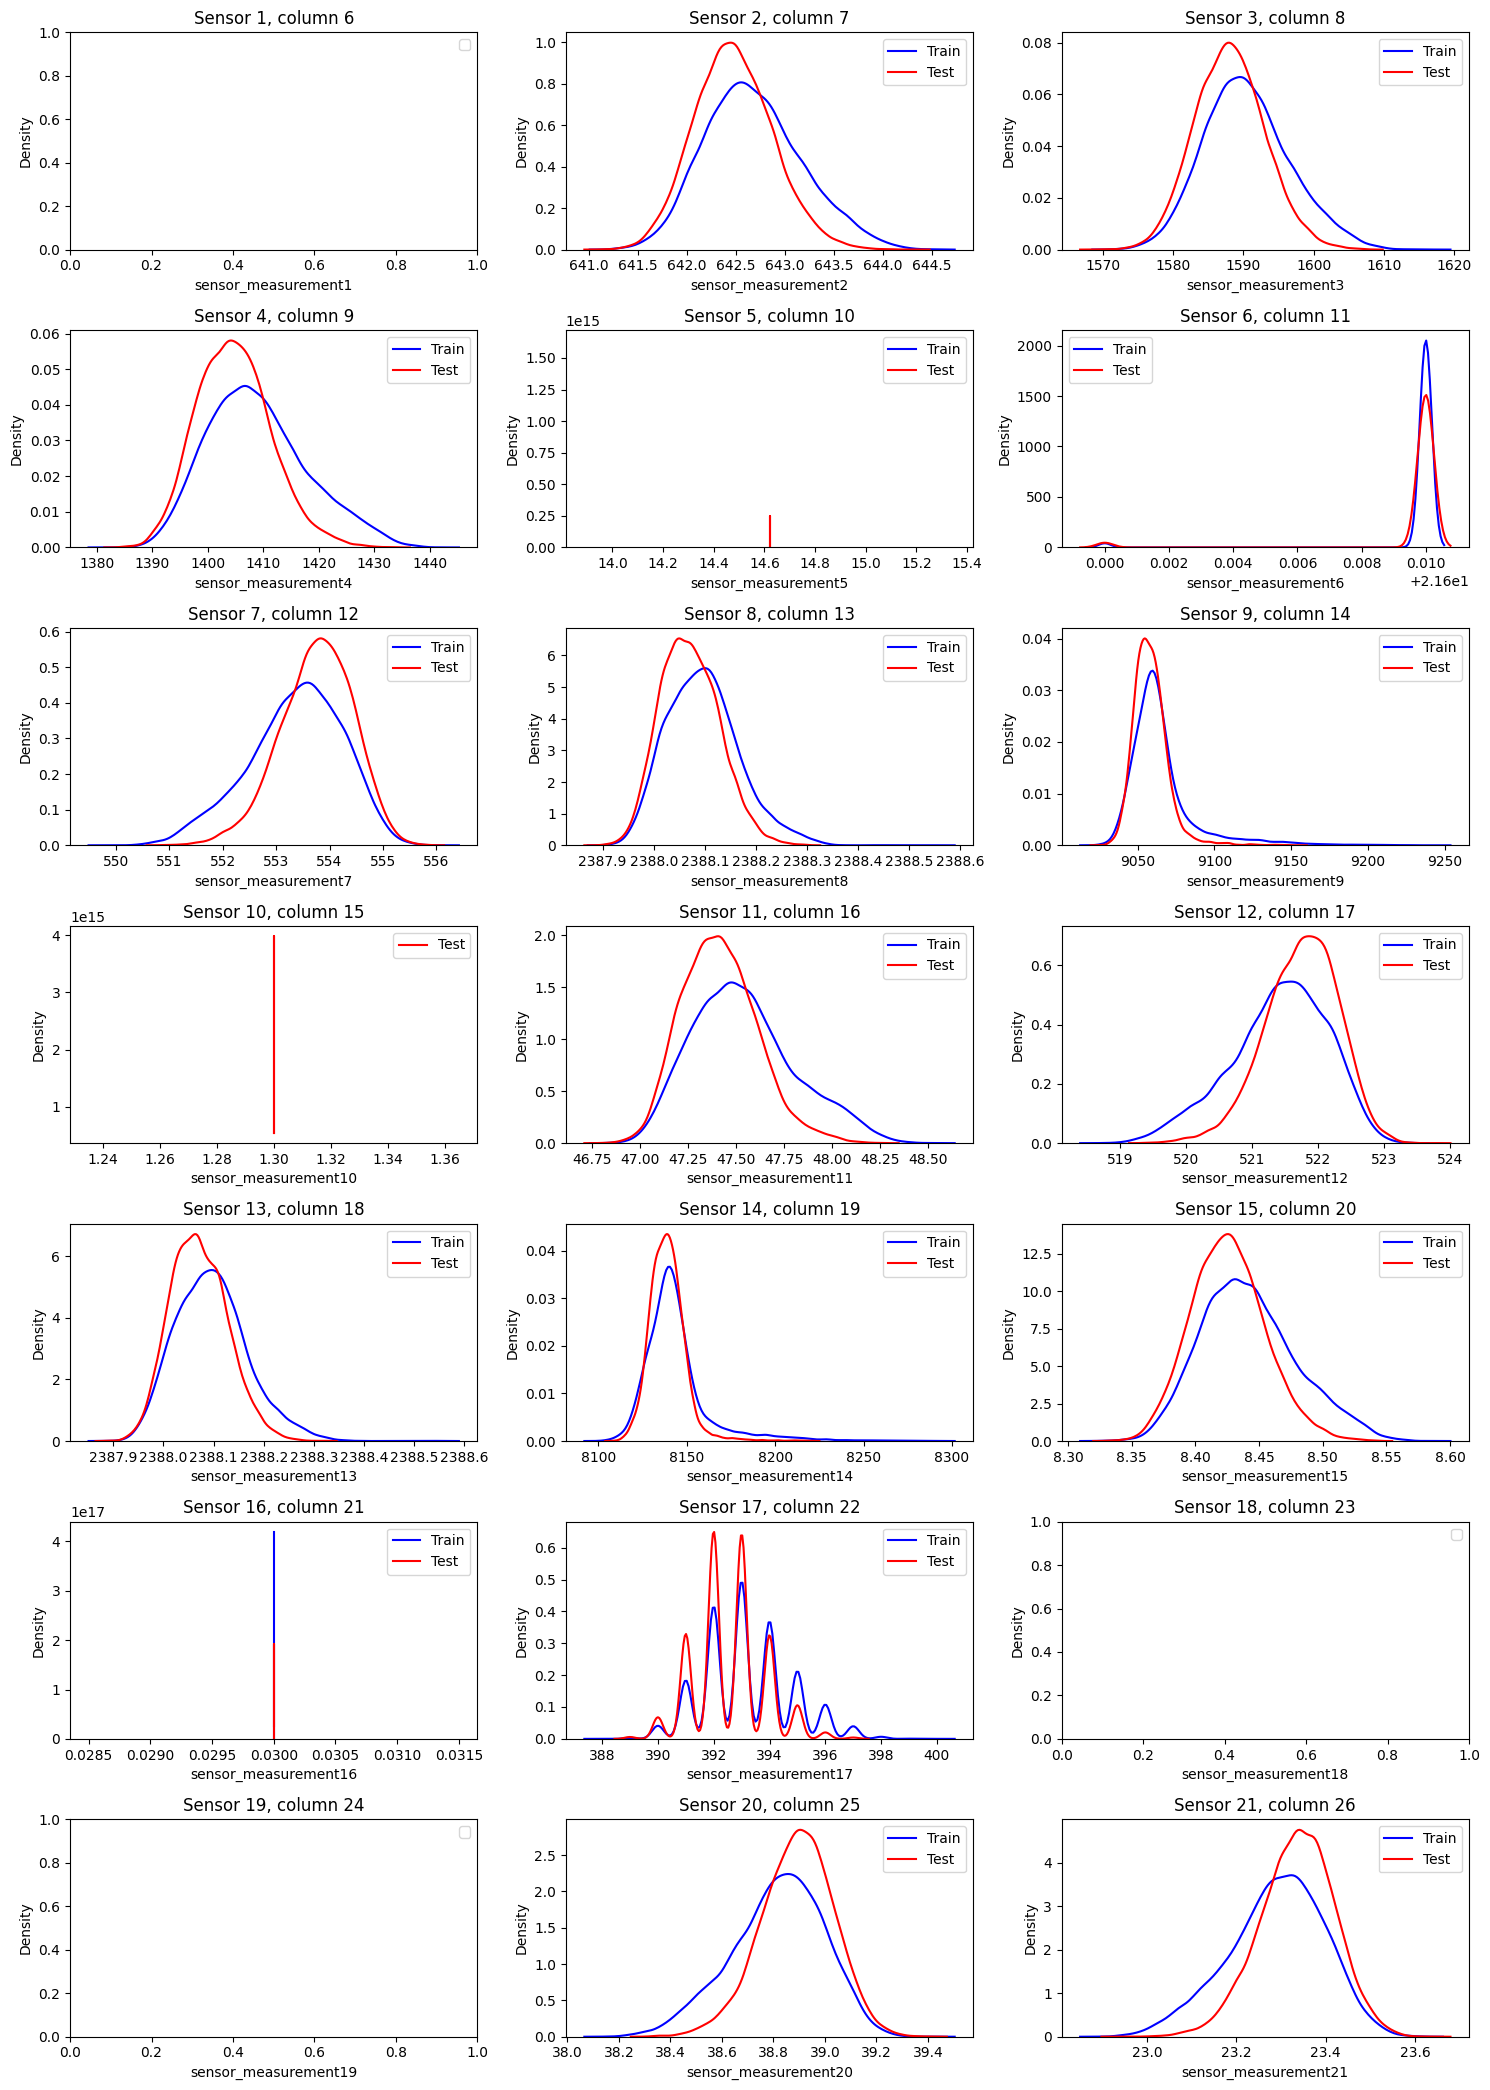

In [26]:
# Check the number of columns in train1 and test1
num_train_columns = len(train1.columns)
num_test_columns = len(test1.columns)

# Print the number of columns
print("Number of columns in train1:", num_train_columns)
print("Number of columns in test1:", num_test_columns)

# Compare only sensor data
columns_to_compare = [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]

# Make sure columns_to_compare contains valid indices
valid_columns_to_compare = [col_idx for col_idx in columns_to_compare if col_idx < num_train_columns]

# Loop through valid columns
plt.figure(figsize=(15, 21))
for i, j in enumerate(valid_columns_to_compare):
    # Check if the column data type is numeric or datetime
    if train1.iloc[:, j].dtype in ['float64', 'int64', 'datetime64[ns]']:
        temp_train = train1.iloc[:, j]
        temp_test = test1.iloc[:, j]

        plt.subplot(7, 3, i + 1)

        sns.kdeplot(temp_train, color="blue", label="Train")
        sns.kdeplot(temp_test, color="red", label="Test")

        plt.title("Sensor " + str(j - 4) + ", column " + str(j + 1))
        plt.legend()
plt.tight_layout()
plt.show()

<Axes: >

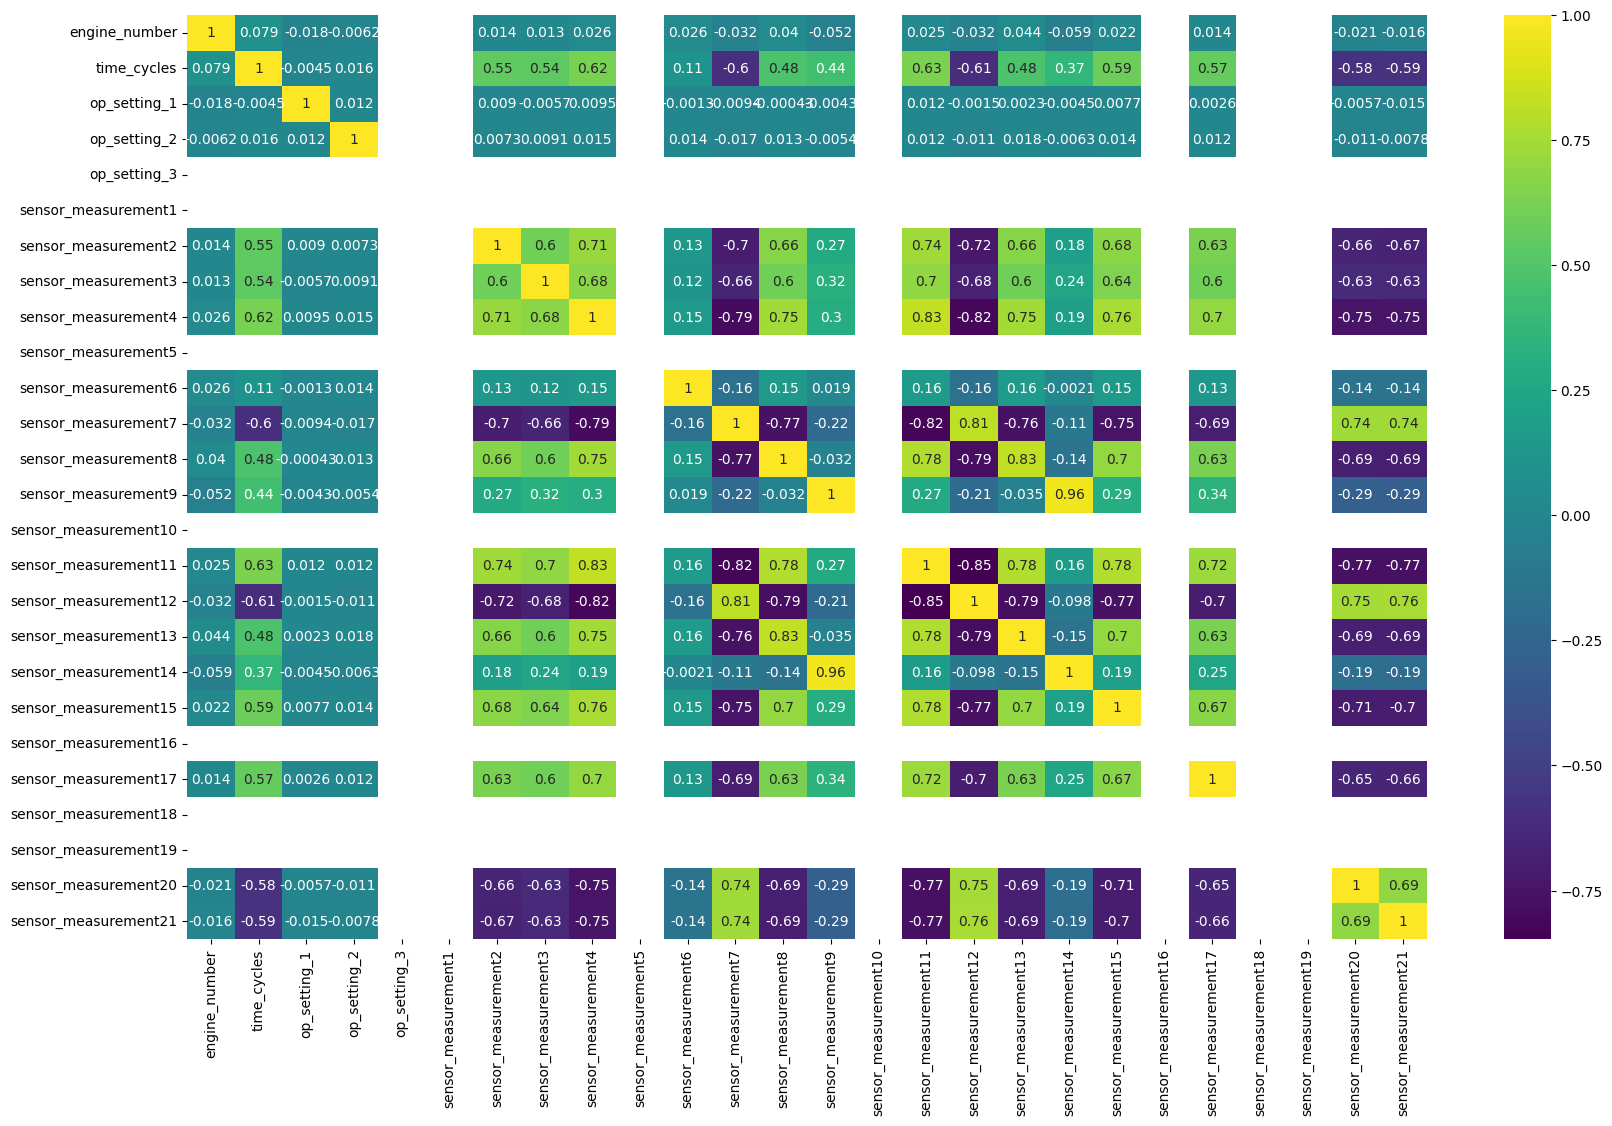

In [27]:
#correlation
plt.figure(figsize=(20,12))
sns.heatmap(train1.corr(),annot=True,cmap='viridis')

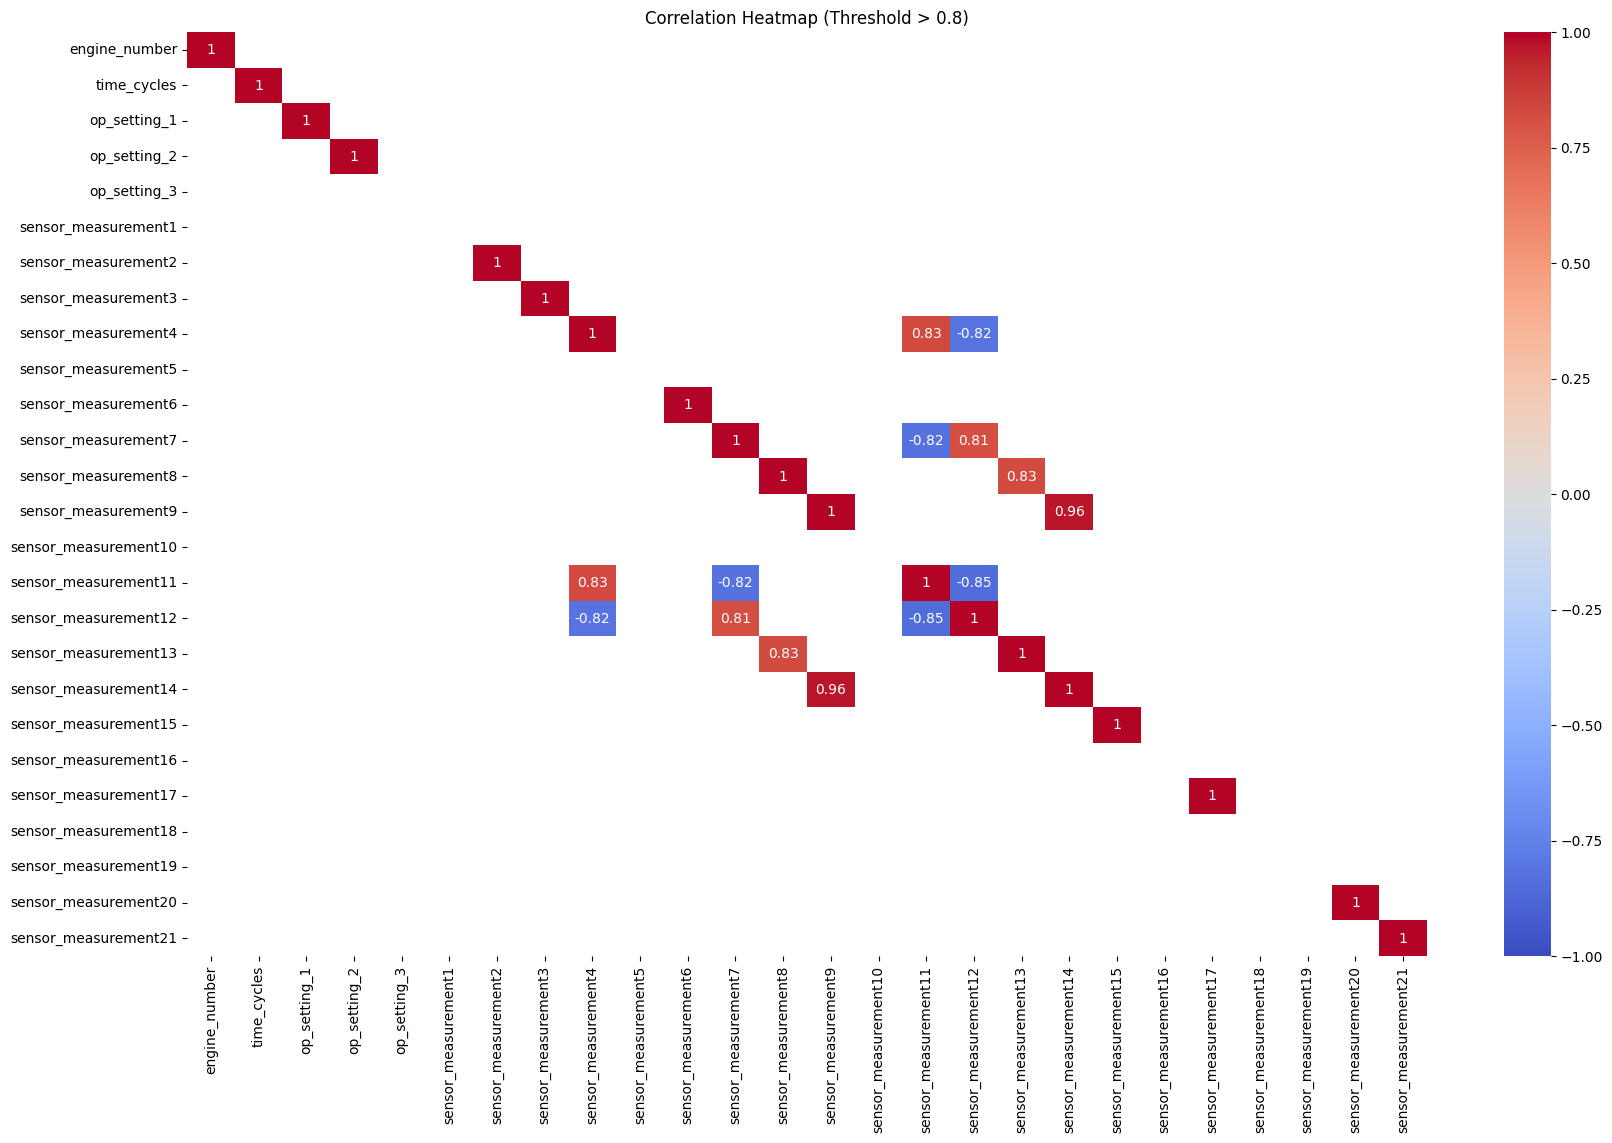

In [28]:

# Calculate the correlation matrix with threshold 0.8
correlation_matrix = train1.corr()

# Create a mask to display only correlations above the threshold
threshold = 0.8
mask = correlation_matrix.applymap(lambda x: abs(x) > threshold)

# Create a heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix[mask], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(f'Correlation Heatmap (Threshold > {threshold})')
plt.show()

In [29]:
# Find columns with correlations greater than 0.8
correlation_threshold = 0.8
highly_correlated_columns = []
for column in correlation_matrix.columns:
    correlated_columns = [col for col in correlation_matrix.index if col != column and abs(correlation_matrix[column][col]) > correlation_threshold]
    if correlated_columns:
        highly_correlated_columns.append((column, correlated_columns))

# Display the columns with correlations greater than 0.8
for pair in highly_correlated_columns:
    print(f"Feature '{pair[0]}' and {', '.join(pair[1])} have a correlation greater than {correlation_threshold}.")

Feature 'sensor_measurement4' and sensor_measurement11, sensor_measurement12 have a correlation greater than 0.8.
Feature 'sensor_measurement7' and sensor_measurement11, sensor_measurement12 have a correlation greater than 0.8.
Feature 'sensor_measurement8' and sensor_measurement13 have a correlation greater than 0.8.
Feature 'sensor_measurement9' and sensor_measurement14 have a correlation greater than 0.8.
Feature 'sensor_measurement11' and sensor_measurement4, sensor_measurement7, sensor_measurement12 have a correlation greater than 0.8.
Feature 'sensor_measurement12' and sensor_measurement4, sensor_measurement7, sensor_measurement11 have a correlation greater than 0.8.
Feature 'sensor_measurement13' and sensor_measurement8 have a correlation greater than 0.8.
Feature 'sensor_measurement14' and sensor_measurement9 have a correlation greater than 0.8.


In [30]:
rul1['engine_number'] = rul1.index + 1

In [41]:
rul1

,RUL,engine_number
0,112,1
1,98,2
2,69,3
3,82,4
4,91,5
...,...,...
95,137,96
96,82,97
97,59,98
98,117,99


In [31]:
# Remove Constant op_setting_3 and Sensor1,5,6,10,16,18,19 Column from train and test data
drop_columns = ['op_setting_3','sensor_measurement1','sensor_measurement5','sensor_measurement6','sensor_measurement10',
               'sensor_measurement16','sensor_measurement18','sensor_measurement19']
train1_without_constant = train1.drop(columns=drop_columns, axis = 1)
test1_without_constant = test1.drop(columns = drop_columns, axis = 1)

In [32]:
train1_without_constant.shape

(20631, 18)

In [33]:
train1_without_constant


,engine_number,time_cycles,op_setting_1,op_setting_2,sensor_measurement2,sensor_measurement3,sensor_measurement4,sensor_measurement7,sensor_measurement8,sensor_measurement9,sensor_measurement11,sensor_measurement12,sensor_measurement13,sensor_measurement14,sensor_measurement15,sensor_measurement17,sensor_measurement20,sensor_measurement21
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640


In [34]:
class RULCalculator:
    def __init__(self, train_df, test_df, rul_df):
        self.train_df = train_df
        self.test_df = test_df
        self.rul_df = rul_df

    def add_rul_to_train_data(self):
        train_grouped_by_unit = self.train_df.groupby(by='engine_number')
        max_time_cycles = train_grouped_by_unit['time_cycles'].max()
        merged = self.train_df.merge(max_time_cycles.to_frame(name='max_time_cycle'), left_on='engine_number', right_index=True)
        merged["RUL"] = merged["max_time_cycle"] - merged['time_cycles']
        merged = merged.drop("max_time_cycle", axis=1)
        return merged

    def add_rul_to_test_data(self):
        test_grouped_by_unit = self.test_df.groupby(by='engine_number')
        max_time_cycles = test_grouped_by_unit['time_cycles'].max()
        merged = self.test_df.merge(max_time_cycles.to_frame(name='max_time_cycle'), left_on='engine_number', right_index=True)
        merged["RUL"] = merged["max_time_cycle"] - merged['time_cycles']
        merged = merged.drop("max_time_cycle", axis=1)
        return merged

    def add_rul_to_test_data_with_rul_df(self):
        test_with_rul = self.add_rul_to_test_data()
        test_with_eolrul = pd.merge(test_with_rul, self.rul_df, on='engine_number', how='left')
        test_with_eolrul['RUL'] = test_with_eolrul['RUL_x'] + test_with_eolrul['RUL_y']
        test_with_eolrul = test_with_eolrul.drop(columns=['RUL_x', 'RUL_y'], axis=1)
        return test_with_eolrul
rul_calculator = RULCalculator(train1_without_constant,test1_without_constant, rul1)


In [35]:
# Adding RUl in train1 data
train1_with_rul = rul_calculator.add_rul_to_train_data()
train1_with_rul

,engine_number,time_cycles,op_setting_1,op_setting_2,sensor_measurement2,sensor_measurement3,sensor_measurement4,sensor_measurement7,sensor_measurement8,sensor_measurement9,sensor_measurement11,sensor_measurement12,sensor_measurement13,sensor_measurement14,sensor_measurement15,sensor_measurement17,sensor_measurement20,sensor_measurement21,RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1


In [36]:
train1_with_rul[train1_with_rul['engine_number'] == 1][['engine_number', 'time_cycles', 'RUL']]

,engine_number,time_cycles,RUL
0,1,1,191
1,1,2,190
2,1,3,189
3,1,4,188
4,1,5,187
...,...,...,...
187,1,188,4
188,1,189,3
189,1,190,2
190,1,191,1


In [37]:
rul_calculator

In [38]:
# Adding Rul data in test data using RUL Dataset
test1_with_rul = rul_calculator.add_rul_to_test_data_with_rul_df()
test1_with_rul

,engine_number,time_cycles,op_setting_1,op_setting_2,sensor_measurement2,sensor_measurement3,sensor_measurement4,sensor_measurement7,sensor_measurement8,sensor_measurement9,sensor_measurement11,sensor_measurement12,sensor_measurement13,sensor_measurement14,sensor_measurement15,sensor_measurement17,sensor_measurement20,sensor_measurement21,RUL
0,1,1,0.0023,0.0003,643.02,1585.29,1398.21,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735,142
1,1,2,-0.0027,-0.0003,641.71,1588.45,1395.42,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916,141
2,1,3,0.0003,0.0001,642.46,1586.94,1401.34,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166,140
3,1,4,0.0042,0.0000,642.44,1584.12,1406.42,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737,139
4,1,5,0.0014,0.0000,642.51,1587.19,1401.92,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,643.24,1599.45,1415.79,553.41,2388.02,9142.37,47.69,520.69,2388.00,8213.28,8.4715,394,38.65,23.1974,24
13092,100,195,-0.0011,-0.0001,643.22,1595.69,1422.05,553.22,2388.05,9140.68,47.60,521.05,2388.09,8210.85,8.4512,395,38.57,23.2771,23
13093,100,196,-0.0006,-0.0003,643.44,1593.15,1406.82,553.04,2388.11,9146.81,47.57,521.18,2388.04,8217.24,8.4569,395,38.62,23.2051,22
13094,100,197,-0.0038,0.0001,643.26,1594.99,1419.36,553.37,2388.07,9148.85,47.61,521.33,2388.08,8220.48,8.4711,395,38.66,23.2699,21


In [42]:
test1_with_rul[test1_with_rul['engine_number'] == 1][['engine_number', 'time_cycles', 'RUL']]
# Rul + (test_max - 1) ...

,engine_number,time_cycles,RUL
0,1,1,142
1,1,2,141
2,1,3,140
3,1,4,139
4,1,5,138
5,1,6,137
6,1,7,136
7,1,8,135
8,1,9,134
9,1,10,133


<Axes: >

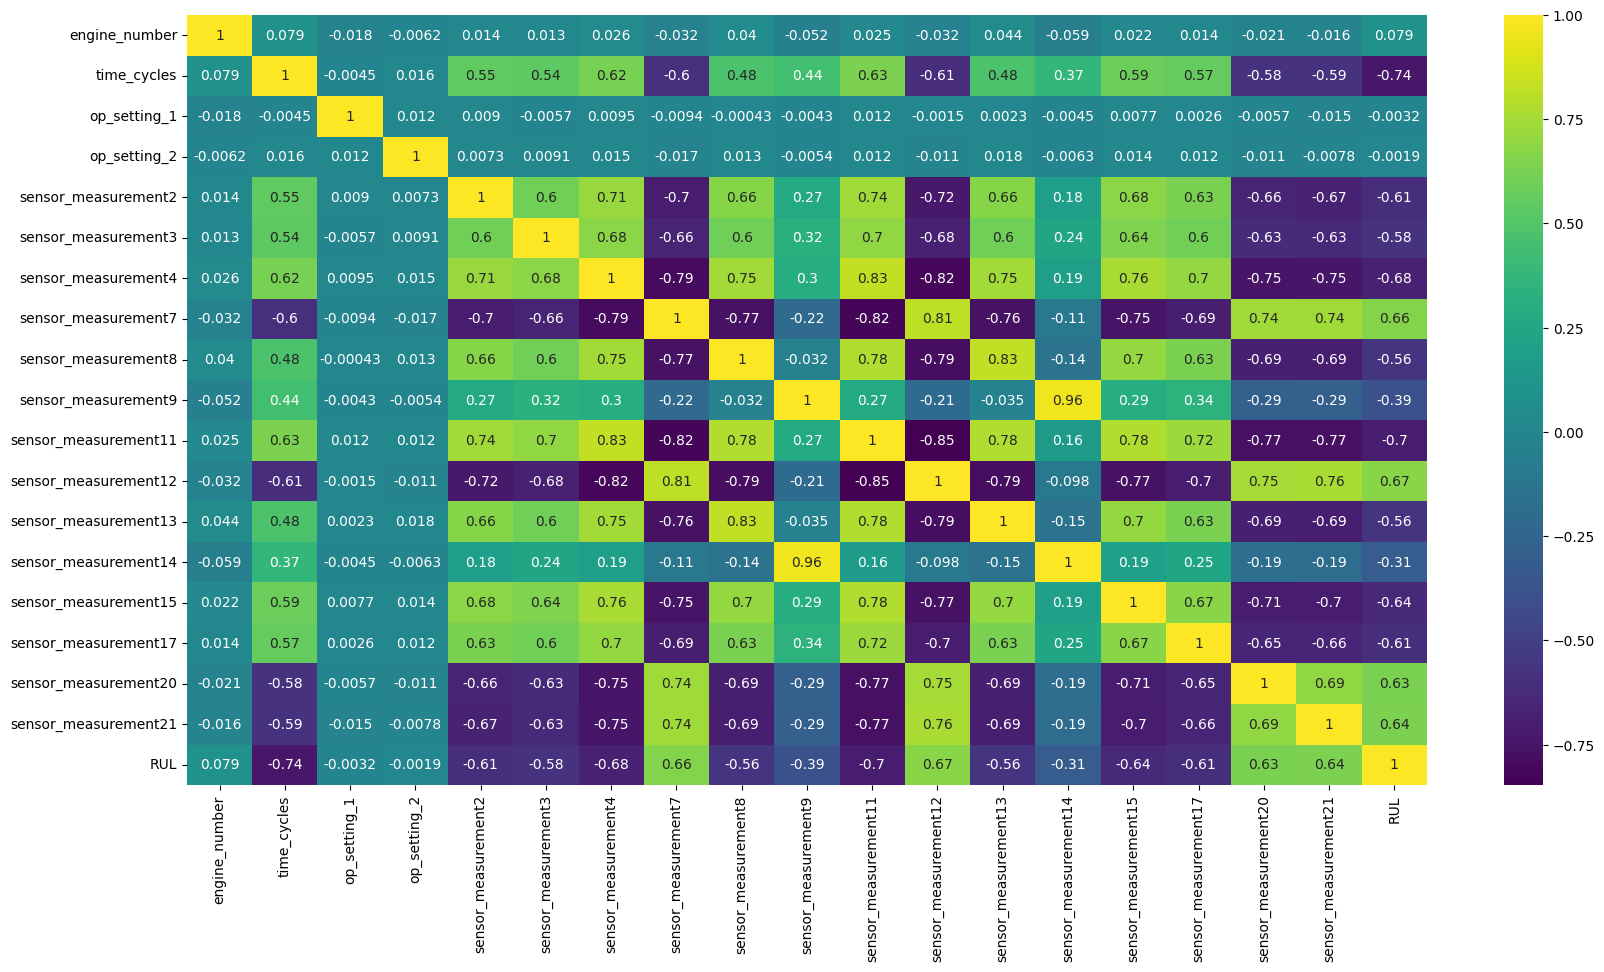

In [43]:
plt.figure(figsize=(20,10))
sns.heatmap(train1_with_rul.corr(),cmap='viridis',annot=True)

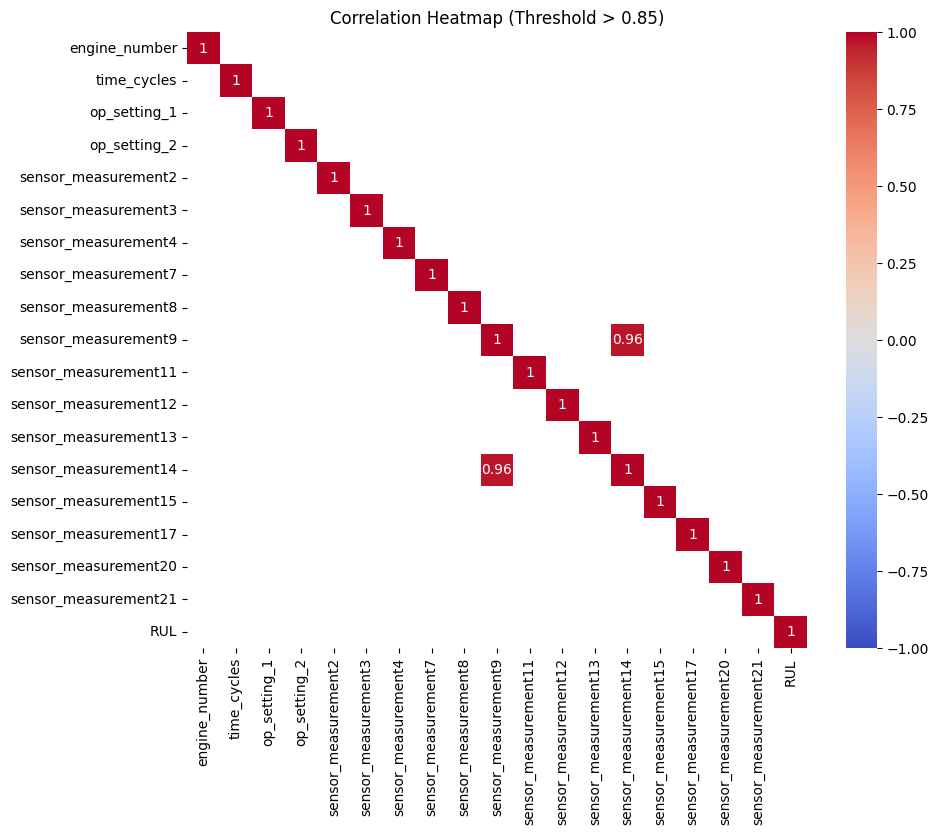

In [44]:
# Calculate the correlation matrix
correlation_matrix = train1_with_rul.corr()

# Create a mask to display only correlations above the threshold
threshold = 0.85
mask = correlation_matrix.applymap(lambda x: abs(x) > threshold)

# Create a heatmap for independent features
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[mask], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(f'Correlation Heatmap (Threshold > {threshold})')
plt.show()

Only Senor_measurement9 have multicillinearity with Senor_measurement14¶

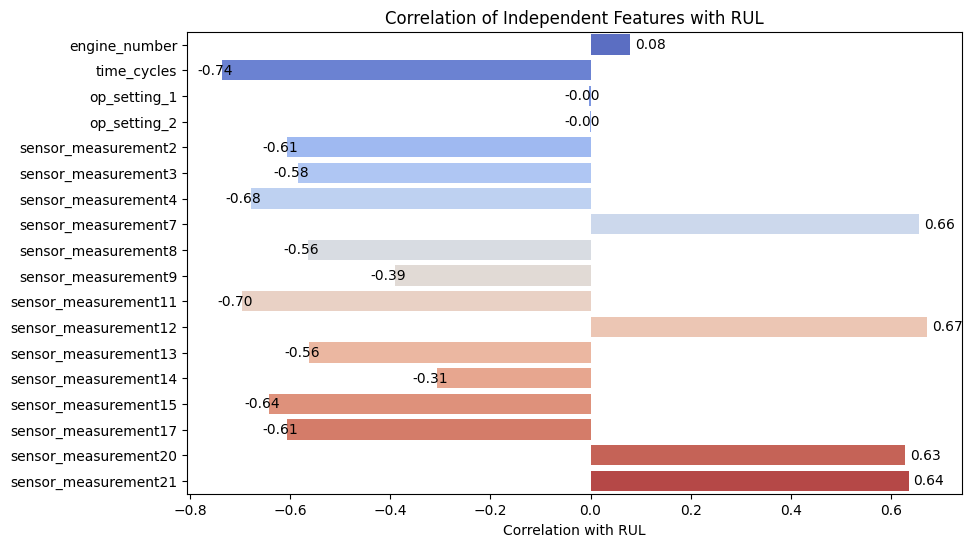

In [45]:
# Calculate the correlations between independent features and 'RUL'
correlations_with_RUL = correlation_matrix['RUL'].drop('RUL')  # Exclude the 'RUL' row

# Create a bar plot for correlations with 'RUL' with annotations
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=correlations_with_RUL.values, y=correlations_with_RUL.index, palette='coolwarm')
plt.xlabel('Correlation with RUL')
plt.title('Correlation of Independent Features with RUL')

# Add numerical annotations
for i, v in enumerate(correlations_with_RUL.values):
    ax.text(v + 0.01 if v >= 0 else v - 0.05, i, f'{v:.2f}', color='black', va='center')

plt.show()

Op_setting does not have any relationship with dependent variable RUL
Senor_measurement9 has high corelated to RUL comparison to Sensor_measurement14
Let's drop Op_setting and Senor_measurement14 features


In [46]:
# Drop highly corelated column
drop_columns = ['op_setting_1','op_setting_2','sensor_measurement14']
train1_without_multicolinearity = train1_with_rul.drop(columns=drop_columns, axis = 1)
test1_without_multicolinearity = test1_with_rul.drop(columns=drop_columns, axis = 1)

In [47]:
train1_without_multicolinearity


,engine_number,time_cycles,sensor_measurement2,sensor_measurement3,sensor_measurement4,sensor_measurement7,sensor_measurement8,sensor_measurement9,sensor_measurement11,sensor_measurement12,sensor_measurement13,sensor_measurement15,sensor_measurement17,sensor_measurement20,sensor_measurement21,RUL
0,1,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,1,2,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,1,3,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,1,4,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,1,5,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8.4956,397,38.49,22.9735,4
20627,100,197,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8.5139,395,38.30,23.1594,3
20628,100,198,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8.5646,398,38.44,22.9333,2
20629,100,199,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8.5389,395,38.29,23.0640,1


In [48]:
# Divide into train and Test
# train_data
X_train = train1_without_multicolinearity.drop('RUL',axis=1)
y_train = train1_without_multicolinearity['RUL']

# test_data
X_test = test1_without_multicolinearity.drop('RUL', axis =1)
y_test = test1_without_multicolinearity['RUL']

In [49]:
X_train

,engine_number,time_cycles,sensor_measurement2,sensor_measurement3,sensor_measurement4,sensor_measurement7,sensor_measurement8,sensor_measurement9,sensor_measurement11,sensor_measurement12,sensor_measurement13,sensor_measurement15,sensor_measurement17,sensor_measurement20,sensor_measurement21
0,1,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392,39.06,23.4190
1,1,2,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236
2,1,3,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442
3,1,4,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739
4,1,5,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8.4956,397,38.49,22.9735
20627,100,197,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8.5139,395,38.30,23.1594
20628,100,198,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8.5646,398,38.44,22.9333
20629,100,199,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8.5389,395,38.29,23.0640


In [50]:
y_train

0        191
1        190
2        189
3        188
4        187
        ... 
20626      4
20627      3
20628      2
20629      1
20630      0
Name: RUL, Length: 20631, dtype: int64

In [51]:
X_test

,engine_number,time_cycles,sensor_measurement2,sensor_measurement3,sensor_measurement4,sensor_measurement7,sensor_measurement8,sensor_measurement9,sensor_measurement11,sensor_measurement12,sensor_measurement13,sensor_measurement15,sensor_measurement17,sensor_measurement20,sensor_measurement21
0,1,1,643.02,1585.29,1398.21,553.90,2388.04,9050.17,47.20,521.72,2388.03,8.4052,392,38.86,23.3735
1,1,2,641.71,1588.45,1395.42,554.85,2388.01,9054.42,47.50,522.16,2388.06,8.3803,393,39.02,23.3916
2,1,3,642.46,1586.94,1401.34,554.11,2388.05,9056.96,47.50,521.97,2388.03,8.4441,393,39.08,23.4166
3,1,4,642.44,1584.12,1406.42,554.07,2388.03,9045.29,47.28,521.38,2388.05,8.3917,391,39.00,23.3737
4,1,5,642.51,1587.19,1401.92,554.16,2388.01,9044.55,47.31,522.15,2388.03,8.4031,390,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,643.24,1599.45,1415.79,553.41,2388.02,9142.37,47.69,520.69,2388.00,8.4715,394,38.65,23.1974
13092,100,195,643.22,1595.69,1422.05,553.22,2388.05,9140.68,47.60,521.05,2388.09,8.4512,395,38.57,23.2771
13093,100,196,643.44,1593.15,1406.82,553.04,2388.11,9146.81,47.57,521.18,2388.04,8.4569,395,38.62,23.2051
13094,100,197,643.26,1594.99,1419.36,553.37,2388.07,9148.85,47.61,521.33,2388.08,8.4711,395,38.66,23.2699


In [53]:
y_test


0        142
1        141
2        140
3        139
4        138
        ... 
13091     24
13092     23
13093     22
13094     21
13095     20
Name: RUL, Length: 13096, dtype: int64